

# PRÁCTICA 3:

REDES DE NEURONAS CONVOLUCIONALES



---



**Grupo 07:**   *Componentes:*

*   Carlos Adaro Cacho
*   Juan Rivera Sánchez
*   Miguel Sanz Almau



---


## **Introducción**
En este proyecto, hemos desarrollado un modelo de red neuronal convolucional (CNN) para la clasificación de imágenes del conjunto de datos CIFAR-100. CIFAR-100 contiene 60,000 imágenes a color de 32x32 píxeles distribuidas en 100 clases, con 600 imágenes por clase. El objetivo es entrenar un modelo que pueda clasificar correctamente estas imágenes en una de las 100 categorías. A continuación, se detallan los pasos seguidos en el desarrollo del modelo, así como los resultados obtenidos.

## **Descripción del Conjunto de Datos**
### **Carga del Conjunto de Datos**
El conjunto de datos CIFAR-100 se carga utilizando la función cifar100.load_data() de Keras. Este se divide en un conjunto de entrenamiento de 50,000 imágenes y un conjunto de prueba de 10,000 imágenes. Cada imagen tiene una dimensión de 32x32 píxeles y está asociada a una etiqueta que indica su clase.

In [ ]:
from keras.datasets import cifar100

(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

print("Shape del conjunto de entrenamiento (imágenes):", train_images.shape)
print("Shape del conjunto de entrenamiento (etiquetas):", train_labels.shape)
print("Número de clases en CIFAR-100:", len(set(train_labels.flatten())))
print("Shape del conjunto de prueba (imágenes):", test_images.shape)
print("Shape del conjunto de prueba (etiquetas):", test_labels.shape)


169001437/169001437 [==============================] - 11s 0us/step
Shape del conjunto de entrenamiento (imágenes): (50000, 32, 32, 3)
Shape del conjunto de entrenamiento (etiquetas): (50000, 1)
Número de clases en CIFAR-100: 100
Shape del conjunto de prueba (imágenes): (10000, 32, 32, 3)
Shape del conjunto de prueba (etiquetas): (10000, 1)


## **Visualización de Imágenes de Entrenamiento**
Para entender mejor los datos, se seleccionaron 10 imágenes aleatorias del conjunto de entrenamiento y se visualizaron con sus etiquetas correspondientes

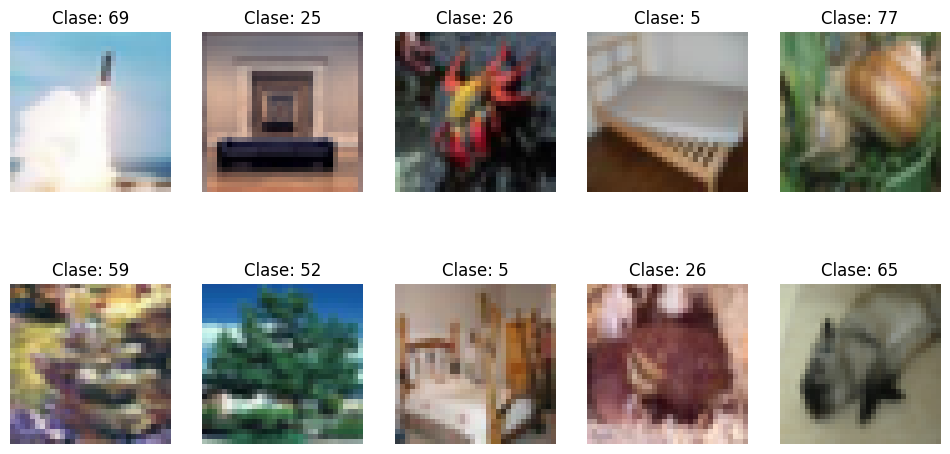

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

random_indices = np.random.choice(len(train_images), size=10, replace=False)

plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(train_images[index])
    plt.title(f"Clase: {train_labels[index][0]}")
    plt.axis('off')
plt.show()


## **Preprocesamiento de Datos**


### **Normalización**
Las imágenes se normalizan para tener valores entre 0 y 1, lo cual es crucial para que el modelo converja más rápido y con mayor precisión.

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


### **One-Hot Encoding**
Las etiquetas se convierten a formato one-hot para que sean compatibles con la función de pérdida categorical_crossentropy.

In [ ]:
from keras.utils import to_categorical

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)


### **División del Conjunto de Entrenamiento**
Se divide el conjunto de entrenamiento en un conjunto de entrenamiento (80%) y un conjunto de validación (20%).

In [ ]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels_one_hot, val_labels_one_hot = train_test_split(
    train_images, train_labels_one_hot, train_size=0.8)


### **Aumento de Datos**
Se utiliza ImageDataGenerator para aumentar artificialmente el tamaño del conjunto de datos de entrenamiento mediante transformaciones aleatorias como rotaciones, desplazamientos y volteos horizontales.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(train_images)


## **Arquitectura del Modelo**
El modelo CNN se define utilizando la API secuencial de Keras. La arquitectura incluye varias capas convolucionales, capas de pooling, normalización por lotes, y capas completamente conectadas con regularización y dropout para prevenir el sobreajuste.

### **Resumen de las Funciones de las Capas**

* Conv2D: Extrae características de la imagen mediante la aplicación de filtros
convolucionales. Las capas convolucionales permiten al modelo aprender y detectar patrones locales en la imagen, como bordes, texturas y formas.

* MaxPooling2D: Reduce la resolución espacial de las características extraídas, manteniendo las características más importantes y reduciendo la cantidad de parámetros en el modelo. Esto también mejora la invariancia espacial, haciendo el modelo más robusto a pequeñas variaciones en la posición de las características.

* BatchNormalization: Normaliza las activaciones para mejorar la estabilidad y la velocidad del entrenamiento. Esto permite que la red aprenda de manera más efectiva y reduce el riesgo de sobreajuste.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras import regularizers

model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(3, 3), padding='same', filters=64, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=64, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=128, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=128, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=256, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=256, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=512, activation='relu'))
model.add(Conv2D(kernel_size=(3, 3), padding='same', filters=512, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())



Para cada conjunto de capas, hemos decidido agregar dos capas convolucionales adicionales incrementando el número de filtros. Esta estrategia permite que la red aprenda representaciones más complejas y abstractas. En las capas iniciales, los filtros pueden captar detalles simples como bordes, texturas y colores básicos. A medida que avanzamos hacia capas más profundas, los filtros comienzan a aprender representaciones más abstractas y de alto nivel.

Esto nos llevó a concluir que aumentar el número de filtros en las capas convolucionales posteriores puede ayudar a la red a capturar características más complejas y abstractas de las imágenes de entrada.

Además, añadimos una capa adicional de MaxPooling2D y otra de BatchNormalization.

Después de las capas convolucionales, añadimos una serie de capas que transforman las representaciones espaciales en una forma que puede ser interpretada por capas completamente conectadas. Aquí está el desglose de cada una de estas capas:

**Capa Flatten:**

Convierte la salida tridimensional de las capas convolucionales en un vector unidimensional. Esta transformación es esencial para conectar las capas convolucionales con las capas densas que siguen.

**Capa Dense (512 neuronas):**

Añade una capa densa con 512 neuronas.

* Función de activación ReLU: Introduce no linealidades, permitiendo que el modelo aprenda relaciones complejas.
* Regularización L2: Se aplica una regularización L2 a los pesos para evitar el sobreajuste, penalizando los pesos grandes y manteniendo el modelo más generalizable.

**Capa Dropout (0.6):**

Incorpora una capa Dropout que desactiva aleatoriamente el 60% de las neuronas durante el entrenamiento. Esta técnica mejora la robustez del modelo al evitar que dependa demasiado de cualquier neurona en particular.

**Capa BatchNormalization:**

Esta capa normaliza las activaciones de la capa anterior. Ayuda a acelerar el entrenamiento y a estabilizar la red ajustando y escalando las activaciones.

**Capa Dense (256 neuronas):**

Introduce otra capa densa con 256 neuronas.

* Función de activación ReLU: Permite capturar relaciones no lineales en los datos.
* Regularización L2: Aplicada nuevamente para reducir el riesgo de sobreajuste.

**Capa Dropout (0.6):**

Añade otra capa Dropout que desactiva aleatoriamente el 60% de las neuronas. Esto sigue ayudando a la red a generalizar mejor al introducir redundancia.

**Capa BatchNormalization:**

Otra capa BatchNormalization para mantener la estabilidad y eficiencia del entrenamiento, normalizando las activaciones.

**Capa Dense (100 neuronas con activación softmax):**

Finalmente, una capa densa con 100 neuronas que corresponde al número de clases del problema.

* Función de activación softmax:
Esta función convierte las salidas en probabilidades, distribuyendo los resultados de manera que la suma sea 1. Es crucial para problemas de clasificación multiclase, ya que proporciona una probabilidad para cada clase posible.







In [ ]:
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(100, activation='softmax'))




Por último, vemos el resumen del modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       1

## **Compilación y Entrenamiento del Modelo**

### **Compilación**
El modelo se compila utilizando el optimizador Nadam y la función de pérdida categorical_crossentropy.

In [ ]:
from tensorflow.keras.optimizers import Nadam

model.compile(loss='categorical_crossentropy',
              optimizer=Nadam(learning_rate=0.001),
              metrics=['accuracy'])


### **Programación del Learning Rate**
Se define una función para ajustar el learning rate a lo largo de las épocas.

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 40))

lr_scheduler = LearningRateScheduler(lr_schedule)


### **Entrenamiento del modelo**
Procedemos a entrenar nuestro modelo.

Hemos experimentado con varios valores de batch_size y hemos encontrado que el valor de 128 es el que mejor resultados nos ha dado. Esta mejora en el entrenamiento puede deberse a los siguientes factores:

- Un tamaño de lote más grande (como 128 en lugar de 64) tiende a aprovechar mejor el paralelismo del hardware, especialmente en GPUs. Esto puede resultar en un entrenamiento más rápido por época.

- Con tamaños de lote más grandes, la estimación del gradiente se basa en un mayor número de ejemplos, lo que puede llevar a gradientes más estables y una convergencia más suave. No obstante, tamaños de lote excesivamente grandes pueden aumentar el riesgo de converger a óptimos locales en lugar de globales.

- Tamaños de lote más grandes pueden proporcionar una forma de regularización estocástica, ya que cada actualización de peso se basa en un conjunto de ejemplos más grande y variado. Esto puede ayudar a reducir el sobreajuste.

- El tamaño del lote puede influir en la capacidad del modelo para generalizar. Tamaños de lote más grandes pueden llevar a modelos que generalizan mejor.


Por lo tanto, un tamaño de lote de 128 podría indicar que el modelo se beneficia de una mayor estabilidad del gradiente o de la regularización estocástica.

Considerando lo anterior, no sería descabellado pensar en aumentar el tamaño del lote a 256. Sin embargo, esto resultó en un peor rendimiento, lo que sugiere que con un batch_size de 256 nuestra red tiende a sobreentrenarse.

El número 313 indica que estamos en el lote (batch) número 313 de un total de 313 lotes en la época actual. Este número se determina por el batch_size elegido (128). En la mayoría de los casos, los lotes se seleccionan aleatoriamente durante el entrenamiento de modelos de aprendizaje profundo. Este método se conoce como "entrenamiento por lotes aleatorios" o "aleatorización de lotes". La idea es que cada época de entrenamiento se compone de múltiples lotes, y en cada época, los lotes se seleccionan aleatoriamente a partir del conjunto de datos de entrenamiento.

In [ ]:
history = model.fit(
    datagen.flow(train_images, train_labels_one_hot, batch_size=128),
    validation_data=(val_images, val_labels_one_hot),
    epochs=50,
    callbacks=[lr_scheduler]
)


Epoch 1/50
313/313 [==============================] - 52s 108ms/step - loss: 5.4173 - accuracy: 0.0445 - val_loss: 5.7787 - val_accuracy: 0.0180 - lr: 0.0010
Epoch 2/50
313/313 [==============================] - 29s 91ms/step - loss: 4.4203 - accuracy: 0.0891 - val_loss: 3.9443 - val_accuracy: 0.1650 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - 31s 100ms/step - loss: 3.9132 - accuracy: 0.1400 - val_loss: 3.5332 - val_accuracy: 0.2058 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - 28s 89ms/step - loss: 3.5758 - accuracy: 0.1873 - val_loss: 3.3326 - val_accuracy: 0.2478 - lr: 0.0010
Epoch 5/50
313/313 [==============================] - 28s 90ms/step - loss: 3.3057 - accuracy: 0.2367 - val_loss: 3.2022 - val_accuracy: 0.2824 - lr: 0.0010
Epoch 6/50
313/313 [==============================] - 28s 90ms/step - loss: 3.0959 - accuracy: 0.2794 - val_loss: 2.8861 - val_accuracy: 0.3273 - lr: 0.0010
Epoch 7/50
313/313 [==============================] - 28

## **Evaluación del Modelo**

### **Evaluación en el Conjunto de Prueba**
El modelo se evalúa en el conjunto de prueba y se imprime la precisión obtenida.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 1.6936 - accuracy: 0.6471
Test accuracy: 0.6470999717712402


### **Visualización de Predicciones**
Se seleccionan algunas imágenes del conjunto de prueba y se visualizan junto con las predicciones del modelo y las etiquetas reales.

1/1 [==============================] - 0s 18ms/step


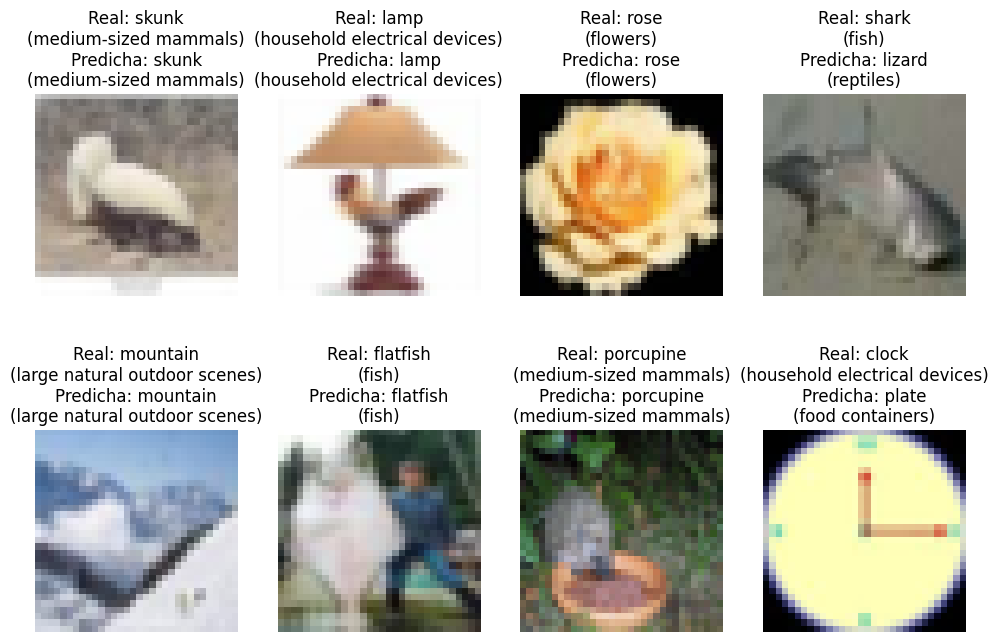

In [ ]:
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

def get_superclass(class_index):
    superclasses_indices = {
        'aquatic mammals': [4, 30, 55, 72, 95],
        'fish': [1, 32, 67, 73, 91],
        'flowers': [54, 62, 70, 82, 92],
        'food containers': [9, 10, 16, 28, 61],
        'fruit and vegetables': [0, 51, 53, 57, 83],
        'household electrical devices': [22, 39, 40, 86, 87],
        'household furniture': [5, 20, 25, 84, 94],
        'insects': [6, 7, 14, 18, 24],
        'large carnivores': [3, 42, 43, 88, 97],
        'large man-made outdoor things': [12, 17, 37, 68, 76],
        'large natural outdoor scenes': [23, 33, 49, 60, 71],
        'large omnivores and herbivores': [15, 19, 21, 31, 38],
        'medium-sized mammals': [34, 63, 64, 66, 75],
        'non-insect invertebrates': [26, 45, 77, 79, 99],
        'people': [2, 11, 35, 46, 98],
        'reptiles': [27, 29, 44, 78, 93],
        'small mammals': [36, 50, 65, 74, 80],
        'trees': [47, 52, 56, 59, 96],
        'vehicles 1': [8, 13, 48, 58, 90],
        'vehicles 2': [41, 69, 81, 85, 89]
    }

    for superclass, indices in superclasses_indices.items():
        if class_index in indices:
            return superclass

sample_indices = [11, 14, 20, 35, 42, 55, 68, 79]

plt.figure(figsize=(12, 8))
for i, sample_index in enumerate(sample_indices, 1):
    sample_image = test_images[sample_index]
    sample_label = test_labels_one_hot[sample_index]

    real_class_index = np.where(sample_label == 1)[0][0]
    sample_image = np.expand_dims(sample_image, axis=0)
    prediction = model.predict(sample_image)
    predicted_label = np.argmax(prediction)

    real_class_name = class_names[real_class_index]
    predicted_class_name = class_names[predicted_label]
    real_superclass = get_superclass(real_class_index)
    predicted_superclass = get_superclass(predicted_label)

    plt.subplot(2, 4, i)
    plt.imshow(test_images[sample_index])
    plt.title(f'Real: {real_class_name}\n({real_superclass})\nPredicha: {predicted_class_name}\n({predicted_superclass})')
    plt.axis('off')

plt.show()


### **Curvas de Aprendizaje**
Se visualizan las curvas de precisión y pérdida durante el entrenamiento y la validación.

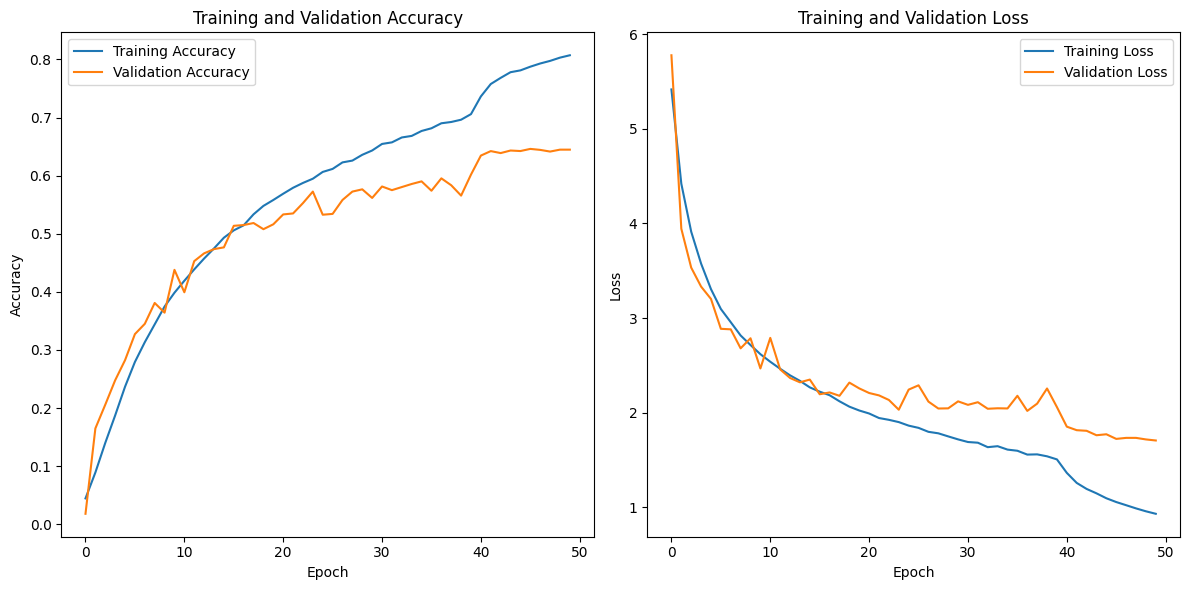

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


## **COMPARACIÓN DE PRUEBAS**



**Prueba 1:**  Ajuste L2 = 0.001 y Dropout = 0.5

---


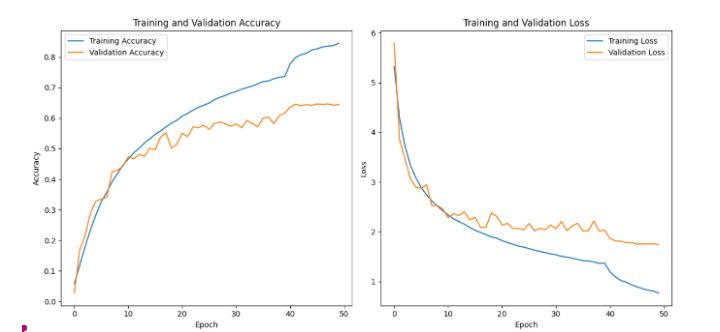

**Prueba 2:**  Ajuste L2 = 0.01 y Dropout = 0.6

---


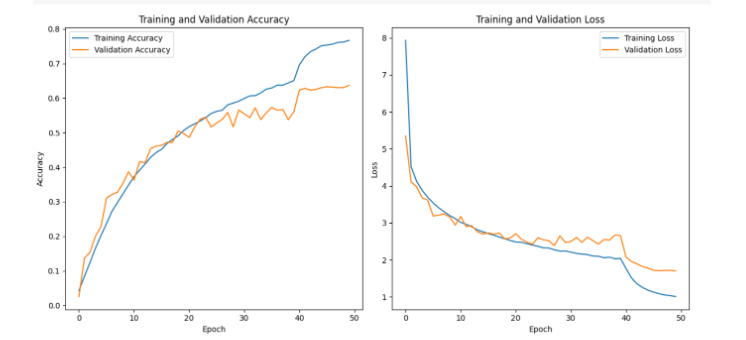

**Prueba 3:**  Ajuste L2 = 0.001 y Dropout = 0.6

---



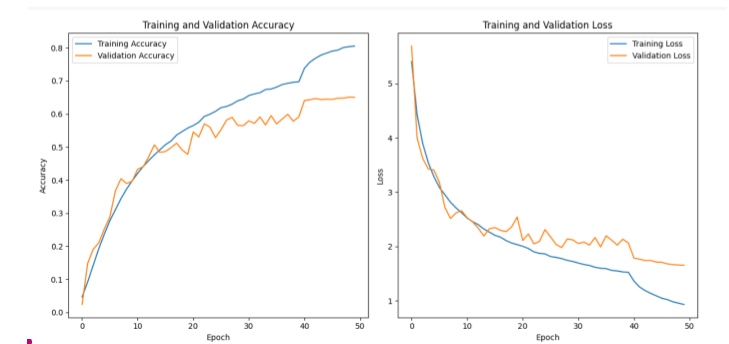
:





* Precisión de Entrenamiento: La prueba 3 muestra la mayor precisión de entrenamiento (Aprox: 0.78), seguida de la prueba 2 (Aprox: 0.75) y la prueba 1 (Aprox: 0.7).
Precisión de Validación: La prueba 3 muestra la mayor precisión de validación (Aprox: 0.6), seguida por la prueba 2 y la prueba 1 (Aprox: 0.55).

* Pérdida de Entrenamiento: La prueba 3 tiene la pérdida de entrenamiento más baja al final, seguida de cerca por la prueba 1, y luego la prueba 2.

* Pérdida de Validación: La prueba 3 tiene la pérdida de validación más baja y estable, seguida por la prueba 1 y luego la prueba 2.


## **Conclusión**
El modelo CNN entrenado logró una precisión considerable en la clasificación de imágenes del conjunto de datos CIFAR-100. A través de diversas técnicas como la normalización, el aumento de datos y el uso de capas de regularización, se pudo mitigar el sobreajuste y mejorar el rendimiento del modelo. Las curvas de aprendizaje indican que el modelo se ajustó bien a los datos de entrenamiento y validación, aunque siempre hay margen para mejoras adicionales, como la optimización de hiperparámetros y la exploración de arquitecturas más avanzadas.

La prueba 3 tiene las mejores gráficas a pesar del sobreajuste. Muestra la mayor precisión de validación (Aprox: 0.6) y una pérdida de validación más baja y estable en comparación con las otras dos pruebas. Esto sugiere que, aunque todas las configuraciones muestran signos de sobreajuste, la configuración de la prueba 3 generaliza mejor a los datos de validación en comparación con las otras dos.




